## Dataset 

* [肝細胞癌](https://www.cbioportal.org/study/clinicalData?id=lihc_tcga)

The recommended (推薦) subject can be divided into two categories:
1. Application(應用)-oriented(面向). 

- **how best to apply the learning algorithms**，you have learned in this course to examine (檢查) them. 

- use the **EDA technique first** to explore the dataset.
- **preprocessing may be required** for most real-world datasets.

- At the end of the project, you should be able to **report some insights (見解) about the dataset you choose**.

1. The following databases are suggested to search for datasets

- [政府資料開放平台](https://data.gov.tw/)
- [Kaggle](https://www.kaggle.com/datasets)
- [Google dataset search](https://datasetsearch.research.google.com/)

2. The following packages are suggested for looking for algorithms that you are interested in or you can use when you are exploring your dataset

- [scikit-learn Machine Learning in Python](https://scikit-learn.org/stable/)
- [statistical models, hypothesis tests, and data exploration](https://www.statsmodels.org/stable/index.html)
- [Welcome to mlxtend's documentation!](http://rasbt.github.io/mlxtend/)
- [scikit-學習貢獻](https://github.com/scikit-learn-contrib/scikit-learn-contrib/blob/master/README.md)
- [cuML - RAPIDS 機器學習庫](https://github.com/rapidsai/cuml)

Procedure (程序)

- Application-oriented Project

1. try to achieve a **high leaderboard (排行榜) score or gain new insight (見解)** into the analysis.<br>


2. Perform **preprocessing and EDA** (Do some data analysis using the **unsupervised methods or utilize (利用) different plots** to understand your data)<br>


3. **Build a model** and try to **find important features**. You can **use statistical approaches (方法)** to argue that one feature is more important than some other feature<br>


4. Compare different models with proper **parameter-selection** techniques (i.e.,cross-validation). You may employ (採用) **statistical hypothesis testing to compare two or more models**. (you might set up logistic regression or linear regression as baselines). Notice you can test them on both synthetic (合成) or the selected dataset<br>


5. Report what you have discovered

- 12 minutes with additional 3 minutes for Q & A
- 課程中教授的主題相關性、技術質量
 
- Abstract (摘要)
1. ■ Introduction and related work (簡介及相關工作)
2. ■ Dataset (數據集)
3. ■ Methods (方法)
4. ■ Experiments and results (實驗與結果)
5. ■ Discussion (討論)
6. ■ Conclusion and future work (結論和未來的工作)
7. ■ Contributions (貢獻)
8. ■ Reference (參考)

- 最多 10 頁 (參考文獻可不算)
- A4 或 8.5 x 11 英寸，字體大於或等於 10pt
- 自由使用單列或雙列佈局
- 貢獻分工表
- 交出代碼，使用 Python 編寫

### 流程

```
第一輪刪變數               我
整理數據(NA跟轉類別...)    

模型排/挑變數              變數重要性(隨機森林/LDA) --> 模型覺得重要的變數 (forward/backward)
第二輪刪變數 

視覺化                     你
--------------
CV
跑模型                   Boosting : Catboost、light GBM
                         Bagging : Random forest、SVM、GAM
                         
結果視覺化                 
解釋
```

### 第一輪刪變數

+ 手動刪變數，全NA的、重複的、變異性小的( 9 成 : 379*0.9 = 341 )、資訊不足又有多 NA，怕亂補出事


+ 第一輪刪了 53 個變數

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 原始尚未分割Training與Testing時，Target的直方圖

In [2]:
df= pd.read_csv(r"C:\Users\l8902\OneDrive\文件\liver_total_data.csv")

<AxesSubplot: xlabel='Overall.Survival.Status', ylabel='count'>

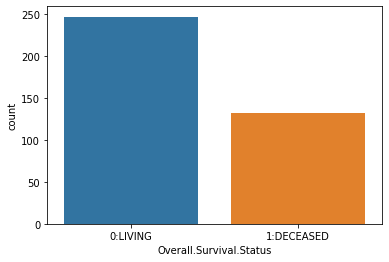

In [3]:
sns.countplot(x = 'Overall.Survival.Status',data=df.loc[:,['Overall.Survival.Status']])

In [4]:
df['Overall.Survival.Status'].value_counts()/df.shape[0]

0:LIVING      0.651715
1:DECEASED    0.348285
Name: Overall.Survival.Status, dtype: float64

#### 以Train4,Test4資料下去做

In [5]:
#!pip install catboost

In [6]:
from sklearn import datasets
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor, StackingClassifier, VotingClassifier
from sklearn import tree
from numpy import mean
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Require extra installation
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

import graphviz 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
train_data4 = pd.read_csv(r"C:\Users\l8902\OneDrive\文件\Train_data4.csv")
test_data4 = pd.read_csv(r"C:\Users\l8902\OneDrive\文件\Test_data4.csv")

<AxesSubplot: xlabel='Overall.Survival.Status', ylabel='count'>

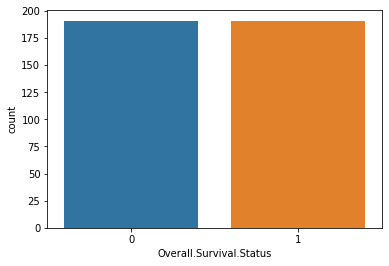

In [8]:
sns.countplot(x = 'Overall.Survival.Status',data=train_data4.loc[:,['Overall.Survival.Status']])

<AxesSubplot: xlabel='Overall.Survival.Status', ylabel='count'>

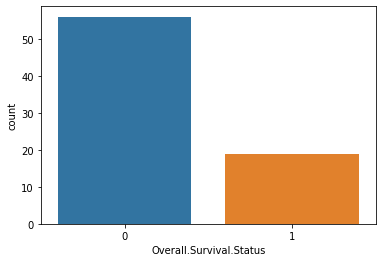

In [9]:
sns.countplot(x = 'Overall.Survival.Status',data=test_data4.loc[:,['Overall.Survival.Status']])

In [10]:
train_data4.head()

,Unnamed: 0,Ablation.embolization.tx.adjuvant,AFP.Normal.Range.Lower.Bound,Neoplasm.Disease.Lymph.Node.Stage.American.Joint.Committee.on.Cancer.Code,Bilirubin.Total,Bilirubin.Total.Norm.Range.Upper,Child.pugh.classification.grade,Specimen.collection.method.name,Disease.Free.Status,Family.History.of.Cancer,...,Platelet.count.preresection,Laboratory.prcoedure.platelet.result.lower.limit.of.normal.value,Laboratory.prcoedure.platelet.result.upper.limit.of.normal.value,Laboratory.procedure.prothrombin.time.result.value,Laboratory.procedure.international.normalization.ratio.result.lower.limit.of.normal.value,Laboratory.procedure.albumin.result.specified.value,Tissue.Source.Site,Person.Neoplasm.Status,Patient.Weight,Overall.Survival.Status
0,0,0.0,0.0,1,0.9,1.2,0.0,0.243750,1.0,0.0,...,175.0,130.0,400.0,0.9,1.0,4.4,0.452381,1.0,62.0,0
1,1,1.0,0.0,0,0.3,1.3,0.0,0.626316,1.0,1.0,...,245.0,143.0,382.0,10.5,8.3,5.3,0.637931,0.0,105.0,0
2,2,0.0,0.0,1,1.3,1.2,0.0,0.626316,1.0,0.0,...,102.0,150.0,400.0,1.4,8.3,2.8,0.416667,0.0,66.0,1
3,3,0.0,0.0,1,0.8,1.2,0.0,0.503205,1.0,0.0,...,113.0,130.0,400.0,1.1,1.0,4.0,0.452381,0.0,62.0,0
4,4,0.0,0.0,1,1.0,1.2,0.0,0.626316,0.0,0.0,...,281.0,130.0,400.0,1.1,0.8,3.0,0.452381,0.0,72.0,0


In [11]:
train_data4 = train_data4.drop("Unnamed: 0", axis=1)
test_data4 = test_data4.drop("Unnamed: 0", axis=1)

X_train = train_data4.drop("Overall.Survival.Status", axis=1)
y_train = train_data4["Overall.Survival.Status"]

X_test = test_data4.drop("Overall.Survival.Status", axis=1)
y_test = test_data4["Overall.Survival.Status"]

- KFold中在K的選取參考連結: https://www.naukri.com/learning/articles/how-to-set-the-value-of-k-in-k-fold-cross-validation/

In [12]:
# evaluate the model using a given test condition
def evaluate_model(cv):
  # get the model
  model = LogisticRegression()
  # evaluate the model
  scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  # return scores
  return mean(scores), scores.min(), scores.max()


folds = range(2,31)
for k in folds:
  # define the test condition
  cv = KFold(n_splits=k, shuffle=True, random_state=5)
  # record mean and min/max of each set of results
  k_mean, k_min, k_max = evaluate_model(cv)
  # report performance
  print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))

-> folds=2, accuracy=0.597 (0.557,0.636)
-> folds=3, accuracy=0.648 (0.579,0.744)
-> folds=4, accuracy=0.674 (0.580,0.783)
-> folds=5, accuracy=0.664 (0.474,0.765)
-> folds=6, accuracy=0.662 (0.528,0.763)
-> folds=7, accuracy=0.659 (0.420,0.877)
-> folds=8, accuracy=0.671 (0.547,0.837)
-> folds=9, accuracy=0.664 (0.504,0.838)
-> folds=10, accuracy=0.675 (0.414,0.824)
-> folds=11, accuracy=0.671 (0.471,0.926)
-> folds=12, accuracy=0.678 (0.443,0.865)
-> folds=13, accuracy=0.654 (0.371,0.943)
-> folds=14, accuracy=0.661 (0.423,0.900)
-> folds=15, accuracy=0.663 (0.471,0.913)
-> folds=16, accuracy=0.638 (0.357,0.914)
-> folds=17, accuracy=0.672 (0.446,0.893)
-> folds=18, accuracy=0.664 (0.472,0.880)
-> folds=19, accuracy=0.669 (0.360,0.920)
-> folds=20, accuracy=0.671 (0.405,0.943)
-> folds=21, accuracy=0.640 (0.370,0.862)
-> folds=22, accuracy=0.657 (0.351,0.943)
-> folds=23, accuracy=0.658 (0.361,0.921)
-> folds=24, accuracy=0.659 (0.400,0.922)
-> folds=25, accuracy=0.669 (0.357,0.929)


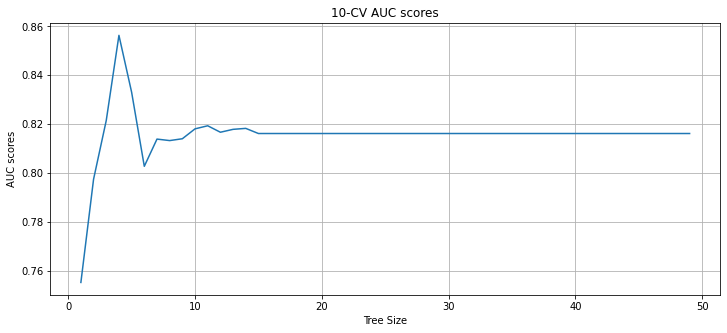

In [13]:
tree_sizes = range(1, 50)  # tree_sizes 定義為我們想要找的樹的深度，樹越深模型複雜度越高

k = 10 
#以常見的(模型性能估計中提供低計算成本和低偏差的良好折衷)為10作為出發點，然而在我們的模型中10也是個不錯的假設
kf5 = KFold(n_splits=k, shuffle=True, random_state=5)
AUC_scores = []

# 10-Fold CV for each tree size 
for size in tree_sizes:
    clf_tree = DecisionTreeClassifier(max_depth=size, random_state=5, criterion='entropy') 
    AUC_s = cross_val_score(clf_tree, X_train, y_train, cv=kf5, scoring='roc_auc')
    AUC_scores.append(np.mean(AUC_s)) #針對不同的樹的深度找出在哪個深度底下ROC_AUC做的最好
    
# plot CV-Accuracy and AUC socres w.r.t tree sizes 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax.plot(tree_sizes, AUC_scores)
ax.set_title('10-CV AUC scores')
ax.set_xlabel('Tree Size')
ax.set_ylabel('AUC scores')
ax.grid(True)
#fig.savefig("10_CV.jpg")

In [14]:
np.array(AUC_scores).argmax()

3

In [15]:
#### Tree size從1開始，所以最大值在4

#### Logistic regression without CV

In [16]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_train_pred = log_classifier.predict_proba(X_train)
y_test_pred = log_classifier.predict_proba(X_test)
print(f"Logistic Regression train roc_auc : {roc_auc_score(y_train, y_train_pred[:,1])}")
print(f"Logistic Regression test roc_auc : {roc_auc_score(y_test, y_test_pred[:,1])}")

Logistic Regression train roc_auc : 0.6860009319919959
Logistic Regression test roc_auc : 0.6466165413533834


#### Logistic regression with 10-Fold CV

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
  # get the dataset
  # get the model
model = LogisticRegression()
  # evaluate the model
cv = KFold(n_splits=10, shuffle=True, random_state=5)
scores = cross_val_score(model,X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  # return scores
print("AUC Score of 10FoldCV in logistic regression: ",mean(scores))

AUC Score of 10FoldCV in logistic regression:  0.6745333658520067


#### n_estimator 參數選擇

In [18]:
#converting the dataset into proper LGB format 
#d_train=lgb.Dataset(X_train, label=y_train)
#Specifying the parameter
params = {    
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'auc',
         'learning_rate':0.1,
            'num_leaves':30, 
           'max_depth': 4,   
    }
data_train = lgb.Dataset(X_train, y_train)
cv_results = lgb.cv(params, data_train, num_boost_round=1000, nfold=10, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=50,seed=5)
print('best n_estimators:', len(cv_results['auc-mean']))

[LightGBM] [Info] Number of positive: 169, number of negative: 173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 342, number of used features: 23
[LightGBM] [Info] Number of positive: 171, number of negative: 171
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 342, number of used features: 23
[LightGBM] [Info] Number of positive: 171, number of negative: 171
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

C:\Users\l8902\anaconda3\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

- 以上述程式碼best n_estimators=56 (LightGBM)

#### LightGBM with max depth of tree = 4 computed by 10-Fold CV (上課講義CH8)

In [19]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=56
                         ,objective = 'binary',metric='binary_logloss',max_depth=4,
                         random_state=5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred=clf.predict(X_train)

y_pred_prob = clf.predict_proba(X_test)
y_train_pred_prob = clf.predict_proba(X_train)

#### Training AUC of LightGBM

In [20]:
print("AUC Score: ", roc_auc_score(y_train, y_train_pred_prob[:,1]) )

AUC Score:  0.9963268550752447


#### Testing AUC of LightGBM

In [21]:
print("AUC Score: ", roc_auc_score(y_test, y_pred_prob[:,1]) )

AUC Score:  0.7678571428571428


#### Feature importance plot of LightGBM

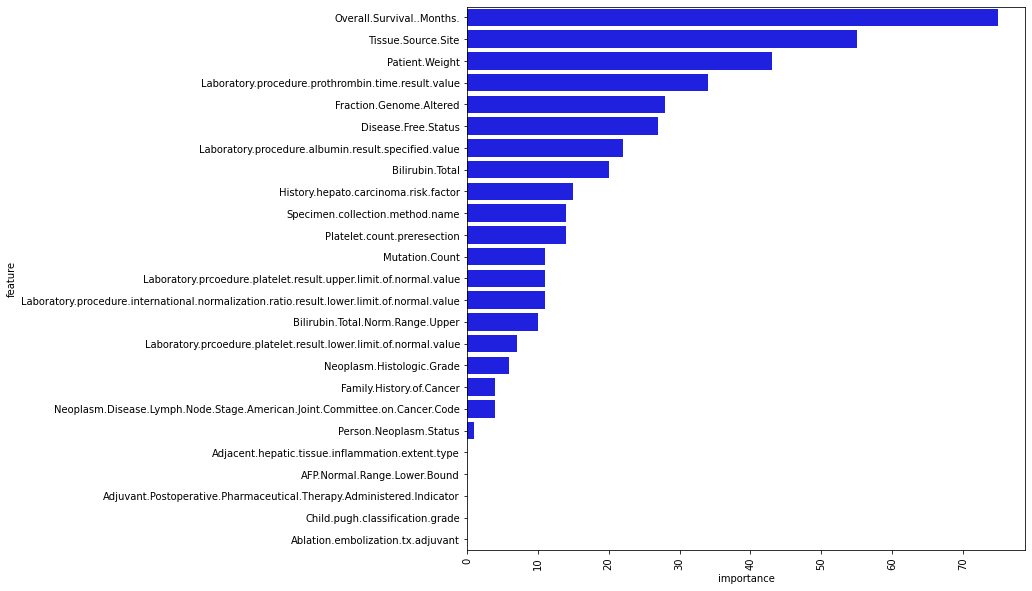

In [22]:
# Plot feature by importance in this model

plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False),
            color='b')
plt.xticks(rotation=90);

#### Random forest with max depth of tree = 4 computed by 10-Fold CV

In [24]:
max_features = X_train.shape[1]
tree_count   = 100
bagging = RandomForestClassifier(max_depth=4, max_features=max_features, random_state=5, n_estimators=tree_count)
bagging.fit(X_train, y_train)

y_pred_prob2 = bagging.predict_proba(X_test)
y_train_pred_prob2 = bagging.predict_proba(X_train)

#### Training AUC of Random forest

In [25]:
print("AUC Score: ", roc_auc_score(y_train, y_train_pred_prob2[:,1]) )

AUC Score:  0.9720402401249965


#### Testing AUC of Random forest

In [26]:
print("AUC Score: ", roc_auc_score(y_test, y_pred_prob2[:,1]) )

AUC Score:  0.7377819548872181


#### Feature importance of Random forest

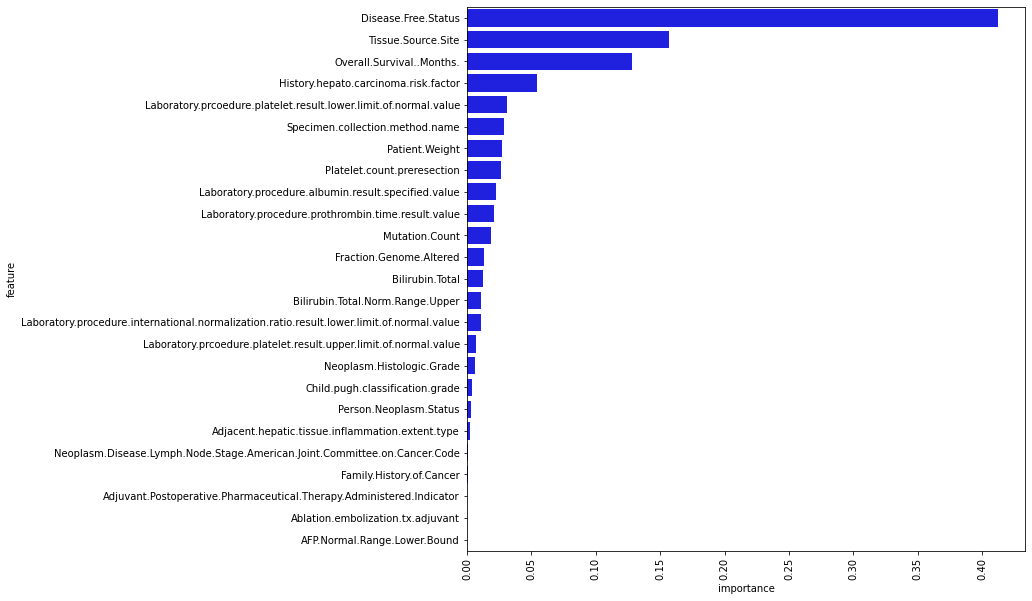

In [27]:
# Plot feature by importance in this model

plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': bagging.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False),
            color='b')
plt.xticks(rotation=90);

#### Catboost with max depth of tree = 4 find n_estimators with GridSearchCV computed by 10-Fold CV

- 參考連結: https://www.projectpro.io/recipes/find-optimal-parameters-for-catboost-using-gridsearchcv-for-classification

In [28]:
#CBC = CatBoostClassifier()
#parameters = {'depth'         : [4],
 #             'learning_rate' : [0.1],
  #            'iterations'    : range(1,100)
   #              }

#Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 10, n_jobs=-1)
#Grid_CBC.fit(X_train, y_train)
#print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

- 以上述程式碼找到最好的n_estimator=86

#### Catboost with max depth of tree = 4 computed by 10-Fold CV

In [29]:
cat = CatBoostClassifier(boosting_type='Plain', learning_rate=0.1, n_estimators=86, random_state=5
                         ,thread_count=-1, logging_level = 'Silent',depth = 4)
cat.fit(X_train, y_train)

y_pred_prob3 = cat.predict_proba(X_test)
y_train_pred_prob3 = cat.predict_proba(X_train)

#### Training AUC of Catboost

In [30]:
print("AUC Score: ", roc_auc_score(y_train, y_train_pred_prob3[:,1]) )

AUC Score:  0.9982456621254899


#### Testing AUC of Catboost

In [31]:
print("AUC Score: ", roc_auc_score(y_test, y_pred_prob3[:,1]) )

AUC Score:  0.7819548872180452


#### Feature importance of Catboost

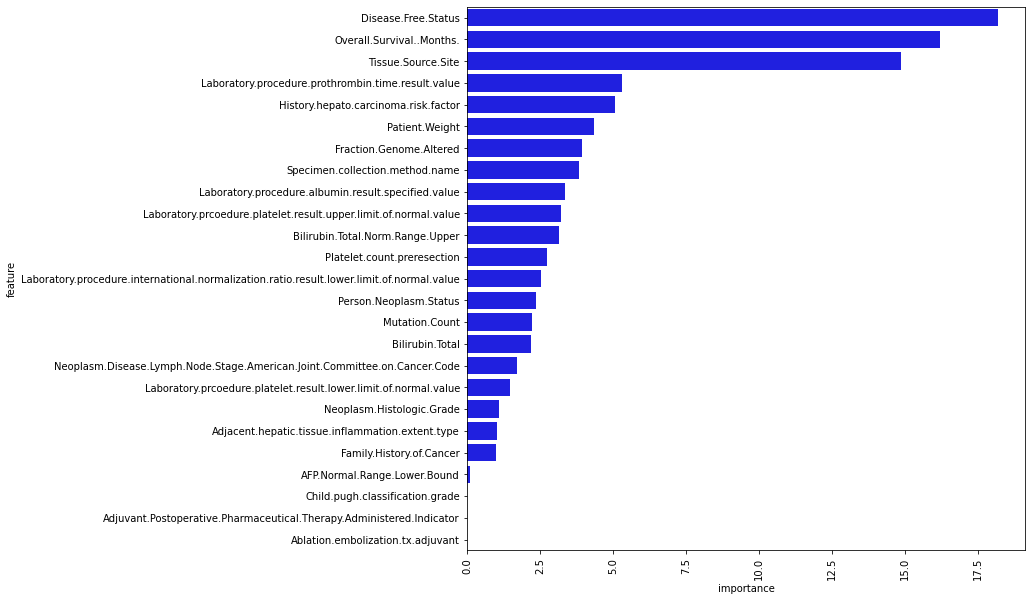

In [32]:
# Plot feature by importance in this model

plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': cat.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False),
            color='b')
plt.xticks(rotation=90);

#### 畫AUC ROC Curve in training set of LightGBM,Random forest, catboost

C:\Users\l8902\AppData\Local\Temp\ipykernel_22664\733933212.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


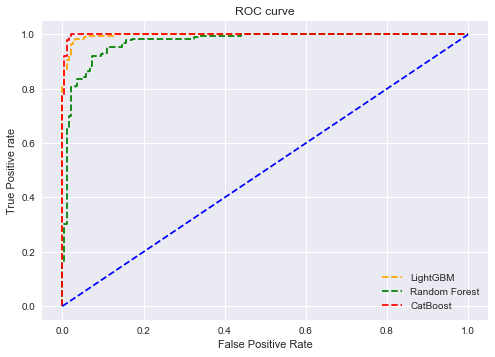

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs)
# roc curve for models
fpr1_0, tpr1_0, thresh1_0 = roc_curve(y_train, y_train_pred_prob[:,1])
fpr2_0, tpr2_0, thresh2_0 = roc_curve(y_train, y_train_pred_prob2[:,1])
fpr3_0, tpr3_0, thresh3_0 = roc_curve(y_train, y_train_pred_prob3[:,1])
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_0, tpr1_0, linestyle='--',color='orange', label='LightGBM')
plt.plot(fpr2_0, tpr2_0, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3_0, tpr3_0, linestyle='--',color='red', label='CatBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_train',dpi=300)
plt.show();

#### 畫AUC ROC Curve in testing set of LightGBM,Random forest, catboost

C:\Users\l8902\AppData\Local\Temp\ipykernel_22664\3701709342.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


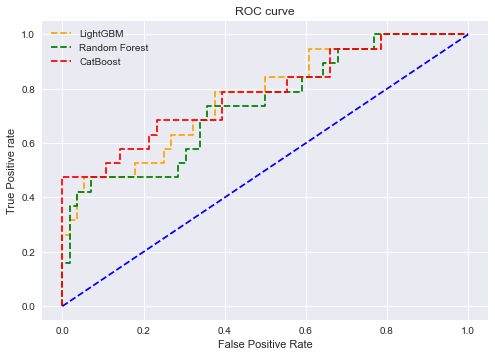

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob[:,1])
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob2[:,1])
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_prob3[:,1])
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LightGBM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='CatBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### plot Confusion matrix function code

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### (評分指標)
from sklearn.metrics import roc_auc_score, confusion_matrix

##### 由多種方法組成，在各種迭代器中用於計算快速且代碼高效的解決方案
import itertools                        # 用在 confusion matrix

##### Progress bar (進度條)
from tqdm import tqdm

##### KFOLD
from sklearn.model_selection import KFold

##### you may import itertools

def plot_confusion_matrix(cm, classes):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)   # interpolation : 插值 
    plt.title('Confusion matrix', fontweight='bold', pad=15)     # 字體重量 :'bold'(粗體), pad : 標題放置距離
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))                # classes : list，的長度，的 array，X 的位置
    plt.xticks(tick_marks, classes, rotation=0)         # xticks : 把坐標軸變成自己想要的樣子，類似覆蓋，覆蓋長度要和原來坐標長度一致
    plt.yticks(tick_marks, classes)                     # rotation=0 : 以度為單位的角度
                                                        # rotation='vertical' : 跟座標垂直
    
    thresh = cm.max() / 2.                              # threshold (臨界點)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                                                        # itertools.product : 兩個集合的笛卡爾積，定義為所有有序對 (a, b) 的集合
                                                        # ex : (0,0)、(0,1)、(1,0)、(1,1)
        plt.text(j, i, format(cm[i, j], 'g'),           # 'd' 十進制整數，輸出以 10 為底的數字，細節 : help('FORMATTING')
                 horizontalalignment="center",          # 水平對齊 {'center', 'right', 'left'}
                 color="white" if cm[i, j] > thresh else "black")
                                                        # 數字大於 threshold (臨界點)，給白色，因為 Blues 是淺藍到深
                                                        # 'g' 浮點數 & 整數 ...
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
    plt.tight_layout()                                  # 調整子圖之間和周圍的填充
 

- Threshold 選取

In [36]:
# 以AUC score作為thresholds選取
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob[:,1])
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob2[:,1])
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_prob3[:,1])

fpr1_0, tpr1_0, thresh1_0 = roc_curve(y_train, y_train_pred_prob[:,1])
fpr2_0, tpr2_0, thresh2_0 = roc_curve(y_train, y_train_pred_prob2[:,1])
fpr3_0, tpr3_0, thresh3_0 = roc_curve(y_train, y_train_pred_prob3[:,1])

- LightGBM training set threshold

In [37]:
auc_train_thres_lightgbm = []
for thres in thresh1_0:
    y_train_pred = np.where(y_train_pred_prob[:,1] > thres,1,0)
    auc_train_thres_lightgbm.append(roc_auc_score(y_train, y_train_pred))
    
auc_train_lgb = pd.concat([pd.Series(thresh1_0), pd.Series(fpr1_0), pd.Series(tpr1_0)
                           , pd.Series(auc_train_thres_lightgbm)],axis = 1)
auc_train_lgb.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_train_lgb.sort_values(by ='AUC', ascending = False, inplace = True)
auc_train_lgb.reset_index(drop = True,inplace = True)

In [38]:
auc_train_lgb['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.5325597954072553

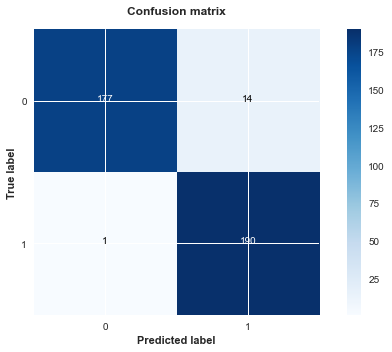

In [39]:
predictions_nominal1_0 = [ 1 if x > 0.4 else 0 for x in y_train_pred_prob[:,1]]
cnf_matrix1 = confusion_matrix(y_train, predictions_nominal1_0 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix1, classes=[0, 1])
plt.savefig('train_cm_lgb.jpg')

In [40]:
recall_train_lgb=cnf_matrix1[1][1]/(cnf_matrix1[1][0]+cnf_matrix1[1][1])

In [41]:
recall_train_lgb

0.9947643979057592

- LightGBM testing set threshold

In [42]:
auc_thres_lightgbm = []
for thres in thresh1:
    y_pred = np.where(y_pred_prob[:,1] > thres,1,0)
    auc_thres_lightgbm.append(roc_auc_score(y_test, y_pred))
    
auc_lgb = pd.concat([pd.Series(thresh1), pd.Series(fpr1), pd.Series(tpr1), pd.Series(auc_thres_lightgbm)],
                        axis = 1)
auc_lgb.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_lgb.sort_values(by ='AUC', ascending = False, inplace = True)
auc_lgb.reset_index(drop = True,inplace = True)

In [43]:
auc_lgb['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.8647695995433698

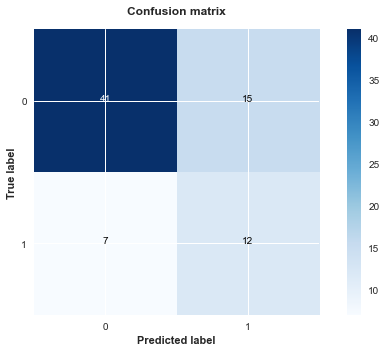

In [44]:
predictions_nominal1 = [ 1 if x > 0.4 else 0 for x in y_pred_prob[:,1]]
cnf_matrix2 = confusion_matrix(y_test, predictions_nominal1 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix2, classes=[0, 1])
plt.savefig('test_cm_lgb.jpg')

In [45]:
recall_test_lgb=cnf_matrix2[1][1]/(cnf_matrix2[1][0]+cnf_matrix2[1][1])

In [46]:
recall_test_lgb

0.631578947368421

- Random forest training set threshold

In [47]:
auc_train_thres_rf = []
for thres in thresh2_0:
    y_train_pred2 = np.where(y_train_pred_prob2[:,1] > thres,1,0)
    auc_train_thres_rf.append(roc_auc_score(y_train, y_train_pred2))
    
auc_train_rf = pd.concat([pd.Series(thresh2_0), pd.Series(fpr2_0), pd.Series(tpr2_0)
                           , pd.Series(auc_train_thres_rf)],axis = 1)
auc_train_rf.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_train_rf.sort_values(by ='AUC', ascending = False, inplace = True)
auc_train_rf.reset_index(drop = True,inplace = True)

In [48]:
auc_train_rf['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.6508670006984575

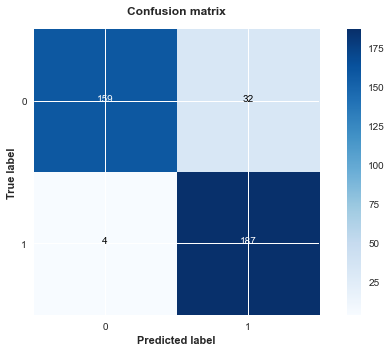

In [49]:
predictions_nominal2_0 = [ 1 if x > 0.4 else 0 for x in y_train_pred_prob2[:,1]]
cnf_matrix3 = confusion_matrix(y_train, predictions_nominal2_0 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix3, classes=[0, 1])
plt.savefig('train_cm_rf.jpg')

In [50]:
recall_train_rf=cnf_matrix3[1][1]/(cnf_matrix3[1][0]+cnf_matrix3[1][1])

In [51]:
recall_train_rf

0.9790575916230366

- Random Forest testing set threshold

In [52]:
auc_thres_rf = []
for thres in thresh2:
    y_pred2 = np.where(y_pred_prob2[:,1] > thres,1,0)
    auc_thres_rf.append(roc_auc_score(y_test, y_pred2))
    
auc_rf = pd.concat([pd.Series(thresh2), pd.Series(fpr2), pd.Series(tpr2), pd.Series(auc_thres_rf)],
                        axis = 1)
auc_rf.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_rf.sort_values(by ='AUC', ascending = False, inplace = True)
auc_rf.reset_index(drop = True,inplace = True)

In [53]:
auc_rf['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.7924965918198223

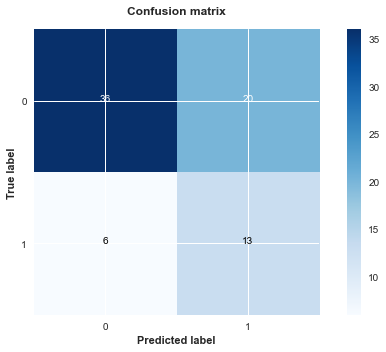

In [54]:
predictions_nominal2 = [ 1 if x > 0.4 else 0 for x in y_pred_prob2[:,1]]
cnf_matrix4 = confusion_matrix(y_test, predictions_nominal2 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix4, classes=[0, 1])
plt.savefig('test_cm_rf.jpg')

In [55]:
recall_test_rf=cnf_matrix4[1][1]/(cnf_matrix4[1][0]+cnf_matrix4[1][1])

In [56]:
recall_test_rf

0.6842105263157895

- Catboost training set threshold

In [57]:
auc_train_thres_cat = []
for thres in thresh3_0:
    y_train_pred3 = np.where(y_train_pred_prob3[:,1] > thres,1,0)
    auc_train_thres_cat.append(roc_auc_score(y_train, y_train_pred3))
    
auc_train_cat = pd.concat([pd.Series(thresh3_0), pd.Series(fpr3_0), pd.Series(tpr3_0)
                           , pd.Series(auc_train_thres_cat)],axis = 1)
auc_train_cat.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_train_cat.sort_values(by ='AUC', ascending = False, inplace = True)
auc_train_cat.reset_index(drop = True,inplace = True)

In [58]:
auc_train_cat['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.5603010902571974

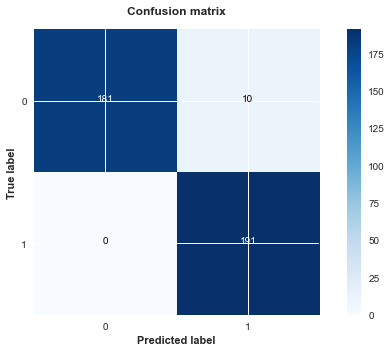

In [59]:
predictions_nominal3_0 = [ 1 if x > 0.4 else 0 for x in y_train_pred_prob3[:,1]]
cnf_matrix5 = confusion_matrix(y_train, predictions_nominal3_0 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix5, classes=[0, 1])
plt.savefig('train_cm_cat.jpg')

In [60]:
recall_train_cat=cnf_matrix5[1][1]/(cnf_matrix5[1][0]+cnf_matrix5[1][1])

In [61]:
recall_train_cat

1.0

- Catboost testing set threshold

In [62]:
auc_thres_cat = []
for thres in thresh3:
    y_pred3 = np.where(y_pred_prob3[:,1] > thres,1,0)
    auc_thres_cat.append(roc_auc_score(y_test, y_pred3))
    
auc_cat = pd.concat([pd.Series(thresh3), pd.Series(fpr3), pd.Series(tpr3), pd.Series(auc_thres_cat)],
                        axis = 1)
auc_cat.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_cat.sort_values(by ='AUC', ascending = False, inplace = True)
auc_cat.reset_index(drop = True,inplace = True)

In [63]:
auc_cat['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.8877644019781092

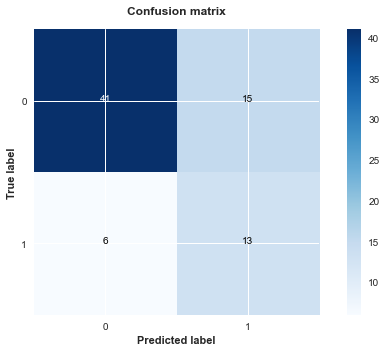

In [64]:
predictions_nominal3 = [ 1 if x > 0.4 else 0 for x in y_pred_prob3[:,1]]
cnf_matrix6 = confusion_matrix(y_test, predictions_nominal3 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix6, classes=[0, 1])
plt.savefig('test_cm_cat.jpg')

In [65]:
recall_test_cat=cnf_matrix6[1][1]/(cnf_matrix6[1][0]+cnf_matrix6[1][1])

In [66]:
recall_test_cat

0.6842105263157895

#### Ensemble method within lightGBM, Random Forest, catBoost

In [67]:
#from sklearn.ensemble import VotingClassifier
#clf1 = VotingClassifier(estimators=[('lgb', clf), ('rf', bagging), ('cat', cat)], voting='hard')

In [68]:
# Taking the mean of the predictions made by all the models
ensemble_train_pred=[]
ensemble_pred = []
for model in [clf,bagging,cat]:
    ensemble_train_pred.append(pd.Series(model.predict_proba(X_train)[:,1]))
    ensemble_pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
finaltrain_prediction = pd.concat(ensemble_train_pred,axis = 1).mean(axis = 1)
finaltest_prediction = pd.concat(ensemble_pred,axis = 1).mean(axis = 1)
print(f"Ensemble training roc-auc: {roc_auc_score(y_train,finaltrain_prediction)}")
print(f"Ensemble test roc-auc: {roc_auc_score(y_test,finaltest_prediction)}")

Ensemble training roc-auc: 0.9955319207258574
Ensemble test roc-auc: 0.7716165413533834


In [69]:
fpr4, tpr4, thresh4 = roc_curve(y_test,finaltest_prediction)

fpr4_0, tpr4_0, thresh4_0 = roc_curve(y_train,finaltrain_prediction)

- Ensemble in training set

In [70]:
auc_train_thres_ensemble = []
for thres in thresh4_0:
    y_train_pred4 = np.where(finaltrain_prediction> thres,1,0)
    auc_train_thres_ensemble.append(roc_auc_score(y_train, y_train_pred4))
    
auc_train_ensemble = pd.concat([pd.Series(thresh4_0), pd.Series(fpr4_0), pd.Series(tpr4_0)
                                , pd.Series(auc_train_thres_ensemble)],axis = 1)
auc_train_ensemble.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_train_ensemble.sort_values(by ='AUC', ascending = False, inplace = True)
auc_train_ensemble.reset_index(drop = True,inplace = True)

In [71]:
auc_train_ensemble['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.6174428600319507

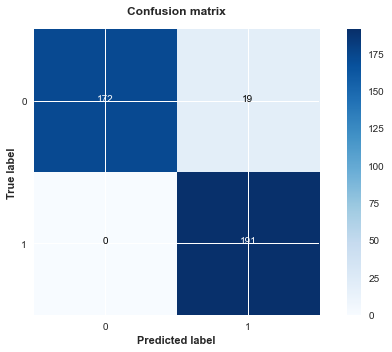

In [72]:
predictions_nominal4_0 = [ 1 if x > 0.4 else 0 for x in finaltrain_prediction]
cnf_matrix7 = confusion_matrix(y_train, predictions_nominal4_0 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix7, classes=[0, 1])
plt.savefig('train_cm_en.jpg')

In [73]:
recall_train_en=cnf_matrix7[1][1]/(cnf_matrix7[1][0]+cnf_matrix7[1][1])

In [74]:
recall_train_en

1.0

- Ensemble in testing set

In [75]:
auc_thres_ensemble = []
for thres in thresh4:
    y_pred4 = np.where(finaltest_prediction> thres,1,0)
    auc_thres_ensemble.append(roc_auc_score(y_test, y_pred4))
    
auc_ensemble = pd.concat([pd.Series(thresh4), pd.Series(fpr4), pd.Series(tpr4), pd.Series(auc_thres_ensemble)],
                        axis = 1)
auc_ensemble.columns = ['Thresholds', 'FPR', 'TPR', 'AUC']
auc_ensemble.sort_values(by ='AUC', ascending = False, inplace = True)
auc_ensemble.reset_index(drop = True,inplace = True)

In [76]:
auc_ensemble['Thresholds'][0]
# 以AUC最大值作為Thresholds

0.8609362684098326

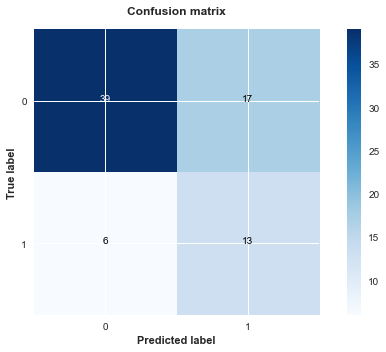

In [77]:
predictions_nominal4 = [ 1 if x > 0.4 else 0 for x in finaltest_prediction]
cnf_matrix8 = confusion_matrix(y_test, predictions_nominal4 , labels=[0, 1])  
plt.figure(figsize=(8, 5))
fig=plot_confusion_matrix(cnf_matrix8, classes=[0, 1])
plt.savefig('test_cm_en.jpg')

In [78]:
recall_test_en=cnf_matrix8[1][1]/(cnf_matrix8[1][0]+cnf_matrix8[1][1])

In [79]:
recall_test_en

0.6842105263157895

C:\Users\l8902\AppData\Local\Temp\ipykernel_22664\970778265.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


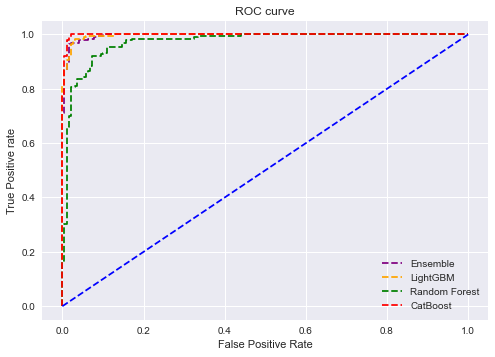

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs)
# roc curve for models
fpr0, tpr0, thresh0 = roc_curve(y_train, finaltrain_prediction)
fpr1_0, tpr1_0, thresh1_0 = roc_curve(y_train, y_train_pred_prob[:,1])
fpr2_0, tpr2_0, thresh2_0 = roc_curve(y_train, y_train_pred_prob2[:,1])
fpr3_0, tpr3_0, thresh3_0 = roc_curve(y_train, y_train_pred_prob3[:,1])
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr0, tpr0, linestyle='--',color='purple', label='Ensemble')
plt.plot(fpr1_0, tpr1_0, linestyle='--',color='orange', label='LightGBM')
plt.plot(fpr2_0, tpr2_0, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3_0, tpr3_0, linestyle='--',color='red', label='CatBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_train_total',dpi=300)
plt.show();

In [81]:
thresholds_model = pd.concat([pd.Series([auc_train_lgb['Thresholds'][0],auc_lgb['Thresholds'][0]]), 
                              pd.Series([auc_train_rf['Thresholds'][0],auc_rf['Thresholds'][0]]), 
                              pd.Series([auc_train_cat['Thresholds'][0],auc_cat['Thresholds'][0]]), 
                              pd.Series([auc_train_ensemble['Thresholds'][0],auc_ensemble['Thresholds'][0]])],
                        axis = 1)

In [82]:
thresholds_model.columns = ['lightgbm', 'randomforest', 'catboost', 'ensemble']

In [83]:
thresholds_model.index = ['training','testing']

In [84]:
thresholds_model

,lightgbm,randomforest,catboost,ensemble
training,0.53256,0.650867,0.560301,0.617443
testing,0.86477,0.792497,0.887764,0.860936


In [85]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_train_pred = log_classifier.predict_proba(X_train)
y_test_pred = log_classifier.predict_proba(X_test)
print(f"Logistic Regression train roc_auc : {roc_auc_score(y_train, y_train_pred[:,1])}")
print(f"Logistic Regression test roc_auc : {roc_auc_score(y_test, y_test_pred[:,1])}")

Logistic Regression train roc_auc : 0.6860009319919959
Logistic Regression test roc_auc : 0.6466165413533834


#### 所有模型的AUC

In [86]:
AUC_forall_model = pd.concat([pd.Series([roc_auc_score(y_train, y_train_pred[:,1]),roc_auc_score(y_test, y_test_pred[:,1])]),
pd.Series([roc_auc_score(y_train, y_train_pred_prob[:,1]),roc_auc_score(y_test, y_pred_prob[:,1])]),
pd.Series([roc_auc_score(y_train, y_train_pred_prob2[:,1]),roc_auc_score(y_test, y_pred_prob2[:,1])]),
pd.Series([roc_auc_score(y_train, y_train_pred_prob3[:,1]),roc_auc_score(y_test, y_pred_prob3[:,1])]),
pd.Series([roc_auc_score(y_train,finaltrain_prediction),roc_auc_score(y_test,finaltest_prediction)])],axis=1)

AUC_forall_model.columns = ['logistic','lightgbm', 'randomforest', 'catboost', 'ensemble']
AUC_forall_model.index = ['training','testing']

In [87]:
AUC_forall_model

,logistic,lightgbm,randomforest,catboost,ensemble
training,0.686001,0.996327,0.972040,0.998246,0.995532
testing,0.646617,0.767857,0.737782,0.781955,0.771617


In [94]:
recall = pd.concat([pd.Series([recall_train_lgb,recall_test_lgb]), 
                              pd.Series([recall_train_rf,recall_test_rf]), 
                              pd.Series([recall_train_cat,recall_test_cat]), 
                              pd.Series([recall_train_cat,recall_test_en])],
                        axis = 1)

In [95]:
recall.columns = ['lightgbm', 'randomforest', 'catboost', 'ensemble']

In [96]:
recall.index = ['training','testing']

In [97]:
recall

,lightgbm,randomforest,catboost,ensemble
training,0.994764,0.979058,1.000000,1.000000
testing,0.631579,0.684211,0.684211,0.684211


C:\Users\l8902\AppData\Local\Temp\ipykernel_22664\796175228.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


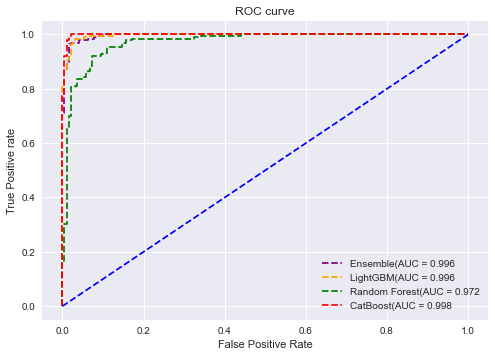

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs)
# roc curve for models
fpr0, tpr0, thresh0 = roc_curve(y_train, finaltrain_prediction)
fpr1_0, tpr1_0, thresh1_0 = roc_curve(y_train, y_train_pred_prob[:,1])
fpr2_0, tpr2_0, thresh2_0 = roc_curve(y_train, y_train_pred_prob2[:,1])
fpr3_0, tpr3_0, thresh3_0 = roc_curve(y_train, y_train_pred_prob3[:,1])
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr0, tpr0, linestyle='--',color='purple', label=f"Ensemble(AUC = {roc_auc_score(y_train,finaltrain_prediction):.3f}")
plt.plot(fpr1_0, tpr1_0, linestyle='--',color='orange', label=f'LightGBM(AUC = {roc_auc_score(y_train, y_train_pred_prob[:,1]):.3f}')
plt.plot(fpr2_0, tpr2_0, linestyle='--',color='green', label=f'Random Forest(AUC = {roc_auc_score(y_train, y_train_pred_prob2[:,1]):.3f}')
plt.plot(fpr3_0, tpr3_0, linestyle='--',color='red', label=f'CatBoost(AUC = {roc_auc_score(y_train, y_train_pred_prob3[:,1]):.3f}')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_train_total',dpi=300)
plt.show();

C:\Users\l8902\AppData\Local\Temp\ipykernel_22664\2258057863.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


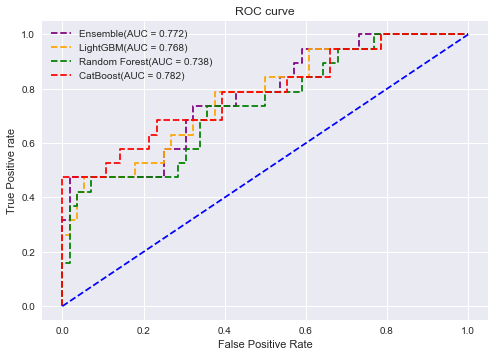

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, finaltest_prediction)
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='purple', label=f"Ensemble(AUC = {roc_auc_score(y_test,finaltest_prediction):.3f})")
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=f"LightGBM(AUC = {roc_auc_score(y_test, y_pred_prob[:,1]):.3f})")
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=f"Random Forest(AUC = {roc_auc_score(y_test, y_pred_prob2[:,1]):.3f})")
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=f"CatBoost(AUC = {roc_auc_score(y_test, y_pred_prob3[:,1]):.3f})")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_total',dpi=300)
plt.show();

### 整理數據(NA跟轉類別...)

### 模型排/挑變數  -->  第二輪刪變數        

+ 變數重要性(隨機森林/LDA)  -->  模型覺得重要的變數 (forward/backward)
 

## 數據集

1. Study.ID : 全都是lihc_tcga (刪)
2. Patient.ID : 病人ID        (刪)
3. Sample.ID : 病人ID(第幾次測量)，第 156,157 & 378,379 (第一行為column name)
4. Ablation.embolization.tx.adjuvant : 消融(剝蝕).栓塞.tx.佐(輔助)劑，(類別，Yes/No)

```
消融和栓塞治療是破壞腫瘤的不同方法，
用於幫助預防或緩解症狀，並且通常與其他類型的治療一起使用。
```

5. AFP.At.Procurement : 採購AFP(甲型胎兒蛋白)，(int.)

```
AFP 是人類發現的第一個具有臨床應用價值的腫瘤標誌物。
AFP 具有通過抑制樹突狀細胞、自然殺傷細胞和 T 淋巴細胞的功能來誘導免疫逃逸的能力。
通過體外修飾，可以增強AFP的免疫原性和免疫應答。
AFP修飾的免疫細胞疫苗或多肽疫苗顯示出對AFP陽性腫瘤細胞的特異性抗腫瘤免疫，
為肝癌的免疫治療奠定了更好的基礎。
AFP : 被常規用作肝細胞癌 (HCC) 篩查、診斷和治療隨訪的腫瘤標誌物。
然而，相當大比例的 HCC 患者即使處於晚期疾病狀態也具有正常的 AFP 水平，正常值應小於20ng/ml
```

6. AFP.Normal.Range.Lower.Bound : 正常範圍下界(int)
7. AFP.Normal.Range.Higher.Bound : 正常範圍上界(int)

```
AFP，1.31–7.89 ng/ml（男性）和 1.01–7.10 ng/ml（女性）
```

8. Diagnosis.Age : 診斷.年齡(int)
9. American.Joint.Committee.on.Cancer.Metastasis.Stage.Code : 美國聯合委員會癌症.轉移.分期.代碼，(類別，MX，M0，M1)
10. Neoplasm.Disease.Lymph.Node.Stage.American.Joint.Committee.on.Cancer.Code : 腫瘤。疾病。淋巴。節點。階段。美國癌症聯合委員會，(類別，NX，N0，N1)

```
T category 類別描述了原始（原發性）腫瘤
TX 無法評估原發腫瘤
T0 沒有原發腫瘤的證據
Tis 原位癌（尚未擴散到鄰近組織的早期癌症）
T1–T4 原發腫瘤的大小和/或範圍

N category 描述癌症是否已經到達附近的淋巴結 
NX 無法評估區域淋巴結
N0 無區域淋巴結受累（淋巴結中未發現癌症）
N1-N3 區域淋巴結受累（數量和/或擴散範圍）

M category 表明是否存在遠處轉移（癌症擴散到身體的其他部位）
MX 無法評估
M0 無遠處轉移（癌症尚未擴散到身體其他部位）
M1 遠處轉移（癌症已經擴散到身體的遠處部位）

一旦確定了 T、N 和 M，就將它們組合起來，並分配一個整體階段 0、I、II、III、IV。有時這些階段也被細分，使用 IIIA 和 IIIB 等字母。
```

11. Neoplasm.Disease.Stage.American.Joint.Committee.on.Cancer.Code : 腫瘤。疾病。階段。美國人。聯合委員會。癌症代碼，(類別，癌症階段)

```
Stage 0 : 存在異常細胞，但尚未擴散到附近的組織。也稱為原位癌或 CIS。CIS 不是癌症，但它可能會變成癌症
Stage I, Stage II, and Stage III : 癌症存在。數字越高，癌症腫瘤越大，擴散到附近組織的程度也越大
Stage IV (may also be written as Stage 4) : 癌症已經擴散到身體的遠處

數字越高，癌症越晚期。通常在第一個數字之後使用字母和數字來更詳細地描述癌症。
例如，2 期前列腺癌可進一步分為 2A、2B 或 2C
```

12. American.Joint.Committee.on.Cancer.Publication.Version.Type : 美國人。聯合的。委員會。上。癌症.出版物.版本.類型，(類別，4th-7th)    (刪)

13. American.Joint.Committee.on.Cancer.Tumor.Stage.Code : 美國人。聯合的。委員會。上。癌症。腫瘤。階段代碼，(類別，T1，T2a，T2，T3...)

14. Bilirubin.Total : 總膽紅素，正常總膽紅素大約在1.2mg/dL以下，(num.)
15. Bilirubin.Total.Norm.Range.Lower : 膽紅素.總計.正常。範圍.下限，(num.)
16. Bilirubin.Total.Norm.Range.Upper : 膽紅素.總計.正常。範圍.上限，(num.)

```
膽紅素數值的重要性，不下於肝發炎指數

1老化的紅血球分解→2形成間接膽紅素→3肝臟處理→4直接膽紅素→
5成為膽汁的一部分→6進入膽囊→7進入十二指腸幫助消化→
8在腸道菌的作用下變成『糞膽素』(黃色)→9隨糞便排出體外。

『總膽紅素』(T-Bil，直接型膽紅素＋間接型膽紅素)

1.總膽紅素(T-Bil)：濃度高時可將皮膚、眼白等染色，稱為黃疸，可能原因為：

˙肝臟正常，但無法處理突然爆量的間接膽紅素(紅血球短時間內死掉太多)；

˙肝臟發炎，無力處理間接膽紅素。

˙常見於急性肝炎、溶血性黃疸、膽結石、膽管炎與阻塞性黃疸等。

2.直接膽紅素(D-bil)：正常情況下，直接膽紅素應會釋出到膽囊，若因為肝炎、膽道阻塞，導致直接膽紅素無法釋入膽道、膽囊中，
造成滯留肝臟而回到血液循環，血中濃度便會升高。
```

17. Cancer.Type : 癌症類型，全Hepatobiliary Cancer(肝膽癌) (刪)
18. Cancer.Type.Detailed : (類別，肝細胞癌，肝細胞惡性腫瘤，NOS，肝細胞癌加肝內膽管癌，纖維板層癌)    (刪，80-90%以上就刪)
19. Child.pugh.classification.grade : 肝硬化嚴重程度的 Child-Pugh 分級，(類別，A，B，C)

```
5 到 6 分被認為是 Child-Pugh A 級（代償良好的疾病）
7 到 9 分是 B 級（顯著的功能損害），
10 到 15 分是 C 級（失代償性疾病）。

失代償是先前在補償的幫助下起作用的結構或系統的功能惡化。
失代償可能由於疲勞，壓力，疾病或老年而發生。當系統被“補償”時，儘管存在壓力或缺陷，它也可以運行。

這些等級與一年和兩年的患者存活率相關：A 級：100% 和 85%；B級：80%和60%；C類：45％和35％。
```

20. Neoplasm.American.Joint.Committee.on.Cancer.Clinical.Group.Stage : 腫瘤。美國人。聯合委員會。上。癌症.臨床.分組.分期，(全NA)  (刪)
21. Neoplasm.American.Joint.Committee.on.Cancer.Clinical.Distant.Metastasis.M.Stage : 腫瘤。美國人。聯合委員會。上。癌症.臨床.遠處.轉移.M.階段，(全NA)  (刪)
22. Neoplasm.American.Joint.Committee.on.Cancer.Clinical.Regional.Lymph.Node.N.Stage : 腫瘤。美國人。聯合的。委員會。癌症.臨床.區域性.淋巴結.N.分期，(全NA)  (刪)
23. Neoplasm.American.Joint.Committee.on.Cancer.Clinical.Primary.Tumor.T.Stage : 腫瘤。美國.聯合。委員會。癌症.臨床.原發性.腫瘤.T.分期，(全NA) (刪)

24. Hematology.serum.creatinine.laboratory.result.value.in.mg.dl :血液學血清肌酐實驗室結果值（以 mg dl 為單位)，(num.)
25. Laboratory.procedure.creatinine.result.lower.limit.of.normal.value : 實驗室.程序.肌酸酐.結果.下限.的。普通的。價值，(num.)
26. Laboratory.procedure.creatinine.result.upper.limit.of.normal.value : 實驗室.程序.肌酸酐.結果.上限.的。普通的。價值，(num.)

```
血清肌酸酐（Creatinine）：是正常肌肉活動分解而來。
正常腎臟會將它從血液中過濾和尿液一起排出體外。
當腎臟功能變差，creatinine也會升高。 其正常值每100cc血液中約0.6-1.2毫克，
但每個醫院的正常值可能稍有差異，且與個人肌肉質量有關，所以男性正常值會略高於女性。

增加於：腎絲球腎炎，腎盂腎炎，尿毒症，末端肥大症．巨人症，甲狀腺功能亢進
減少於：衰弱、肌萎縮(因年紀太大或肌肉量少，尤其懷孕前六個月)
```

27. Days.to.Sample.Collection. : 樣品採集天數，可以前瞻性或回顧性地收集樣品。對於回顧性採集的樣本，這可能是負值，(int.)  (刪)
28. Last.Alive.Less.Initial.Pathologic.Diagnosis.Date.Calculated.Day.Value : 最後的存活少於初步病理學診斷。日期。計算.天數，(一個NA，其餘0) (刪)
29. Days.to.Sample.Procurement : 天。至。樣品.採購，(NA)    (刪)
30. Specimen.collection.method.name : 標本.採集.方法.名稱，做了怎麼樣的手術
31. Disease.Free..Months. : 無病..幾個月，(num.)  
32. Disease.Free.Status : 無病狀態，(類別，有無復發)
33. Disease.code : 疾病代碼，(NA)  (刪)
34. Performance.Status : 癌症患者的表現狀態，0 表示功能齊全且無症狀，4 表示臥床不起，(int.)
35. Ethnicity.Category : 種族.類別，  (刪，9成一樣)
36. Lymphomatous.Extranodal.Site.Involvement.Indicator : 淋巴瘤.結外.部位.受累.指標，(NA)    (刪)
37. Cancer.diagnosis.first.degree.relative.number : 癌症.診斷.首度.親屬.數，(NA多，int.) (刪，資訊不足，怕亂補出事)
38. Family.History.of.Cancer : 癌症家族史，(類別)
39. Form.completion.date : 表格.完成.日期  (刪)
40. Fraction.Genome.Altered : 分數.基因組.改變，(num.) 

```
受拷貝數增加或丟失影響的基因組百分比
提供了關於腫瘤基因組構成的更深入的信息。
這些屬性也可用於查找與特定改變或臨床屬性（例如生存期或腫瘤分期）的相關性。
```

41. Neoplasm.Histologic.Grade : 腫瘤.組織學.分級，(類別)

```
1 級：分化良好（低級），細胞看起來接近正常
2 級：中度分化（中級）
3 級：低分化（高等級）
4 級：未分化（高級）
```

42. Patient.Height : 身高
43. Adjacent.hepatic.tissue.inflammation.extent.type : 鄰近肝組織炎症範圍類型，(類別，嚴重，中，無)
44. Neoplasm.Histologic.Type.Name : 腫瘤.組織學.類型.名稱，(全一樣) (刪)
45. History.hepato.carcinoma.risk.factor : 歷史.肝癌.風險.因素，(類別)
46. Neoadjuvant.Therapy.Type.Administered.Prior.To.Resection.Text : 新輔助。治療。類型。管理。之前。切除.文本，(NO 多數) (刪,90%以上)
47. Prior.Cancer.Diagnosis.Occurence : 先前診斷是否可能發生癌症 (刪,90%以上)
48. ICD.10.Classification : 國際疾病分類 (ICD)，編碼:根本死因 (刪)
49. International.Classification.of.Diseases.for.Oncology..Third.Edition.ICD.O.3.Histology.Code : 腫瘤學國際疾病分類第三版 ICD.O.3 組織學代碼，對腫瘤進行分類，(刪)
50. International.Classification.of.Diseases.for.Oncology..Third.Edition.ICD.O.3.Site.Code : 腫瘤學國際疾病分類第三版 ICD.O.3 網站代碼，跟 48.一樣 (刪)
51. Informed.consent.verified : 知情.同意.核實，(全YES) (刪)
52. Liver.fibrosis.ishak.score.category : 肝纖維化 ishak 評分。類別，0（無纖維化）到 6（肝硬化），(類別)


<<刪>>

53 54 55 57(處理) 58 59 62(刪,90%以上) 63 64 65 66 67 72 73 80 81 82 83 84 89 90 91 92-97(CS) 98(解釋) 102(刪,90%以上) 104  
61 目標